In [1]:
# Dependencies
import tweepy
import matplotlib.pyplot as plt
import pandas as pd
import json
import numpy as np
import time
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()


In [2]:
# Twitter API Keys
consumer_key = ""
consumer_secret = ""
access_token = ""
access_token_secret = ""

# Twitter credentials
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth, parser=tweepy.parsers.JSONParser())


In [3]:
# Create columns for dataframe
sentiments = {'Tweet Number': '',
              'News Organization': '',
              'Tweet': '',
              'Compound Score': '',
              'Positive Score': '',
              'Negative Score': '',
              'Neutral Score': ''}
# Create list of news accounts
target_terms = ['@BBC', '@CBS', '@CNN', '@FoxNews', '@nytimes']



In [4]:
# Variable to hold list of the compound sentiment
compound_list = []
positive_list = []
negative_list = []
neutral_list = []
tweet_number = []
text = []
news_source = []

# Loop through all target users
for target in target_terms:
        
    # Run search around each tweet
    screen_name = target
    public_tweets = api.user_timeline(target,
                                      count=100)
    
    # Index to see how many tweets for each news source
    index = 0
        
    # Loop through all tweets
    for tweet in public_tweets:
        
        news_organization = target
            
        # Run vader analysis on each tweet
        scores = analyzer.polarity_scores(tweet['text'])
        compound = scores['compound']
        pos = scores['pos']
        neu = scores['neu']
        neg = scores['neg']
            
        # Add value to list
        compound_list.append(compound)
        positive_list.append(pos)
        negative_list.append(neg)
        neutral_list.append(neu)
        text.append(tweet['text'])
        tweet_number.append(index)
        news_source.append(news_organization)
        
        index = index + 1


In [5]:
# Add values from list to dataframe
sentiments['Tweet Number'] = tweet_number
sentiments['News Organization'] = news_source
sentiments['Tweet'] = text
sentiments['Compound Score'] = compound_list
sentiments['Positive Score'] = positive_list
sentiments['Negative Score'] = negative_list
sentiments['Neutral Score'] = neutral_list

sentiments_df = pd.DataFrame(sentiments)
sentiments_df.to_csv('sentimentsnewsmedia.csv')
sentiments_df


,Compound Score,Negative Score,Neutral Score,News Organization,Positive Score,Tweet,Tweet Number
0,0.7964,0.000,0.728,@BBC,0.272,Gary Barlow and his ten-piece band perform son...,0
1,0.8268,0.000,0.688,@BBC,0.312,The world's greatest classical musical festiva...,1
2,0.0000,0.000,1.000,@BBC,0.000,RT @BBCSport: This is some semi-final.\n\nWatc...,2
3,-0.7876,0.331,0.669,@BBC,0.000,When someone gets sassy but you've got a kille...,3
4,0.9022,0.000,0.643,@BBC,0.357,The best time to plant a tree was 20 years ago...,4
5,-0.0516,0.062,0.938,@BBC,0.000,When your colleagues ask why you need to leave...,5
6,0.0000,0.000,1.000,@BBC,0.000,RT @BBCNews: Downton Abbey film finally confir...,6
7,0.0382,0.000,0.943,@BBC,0.057,"""I can't pay you, but you can use the photos i...",7
8,-0.7579,0.427,0.418,@BBC,0.155,"The secret to a long, happy relationship? \n\n...",8
9,0.3182,0.000,0.881,@BBC,0.119,The original 1926 map of The Hundred Acre Wood...,9


In [6]:
# Get overall/average of sentiment compount values for each agency
avg_sentiments_df = sentiments_df.groupby('News Organization').mean()
avg_sentiments_df.to_csv('avgsentiments.csv')
avg_sentiments_df


,Compound Score,Negative Score,Neutral Score,Positive Score,Tweet Number
News Organization,,,,,
@BBC,0.146374,0.04913,0.85256,0.09832,49.5
@CBS,0.346520,0.01372,0.79824,0.18805,49.5
@CNN,-0.077570,0.08663,0.85892,0.05447,49.5
@FoxNews,0.057617,0.06273,0.85883,0.07845,49.5
@nytimes,-0.042037,0.08228,0.85534,0.06238,49.5


In [7]:
# Get timestamp
present_date = time.strftime("%m/%d/%Y")
present_date


'07/13/2018'

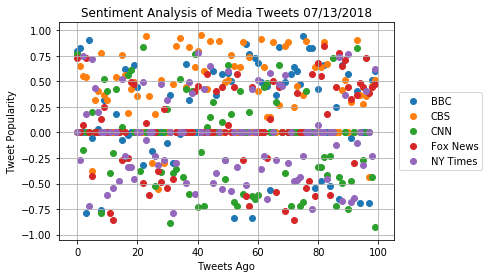

In [8]:
# Create dataframe for each news source and plot
bbc_compound_df = sentiments_df.loc[sentiments_df['News Organization'] == '@BBC']
plt.scatter(bbc_compound_df['Tweet Number'], bbc_compound_df['Compound Score'], label='BBC')

cbs_compound_df = sentiments_df.loc[sentiments_df['News Organization'] == '@CBS']
plt.scatter(cbs_compound_df['Tweet Number'], cbs_compound_df['Compound Score'], label='CBS')

cnn_compound_df = sentiments_df.loc[sentiments_df['News Organization'] == '@CNN']
plt.scatter(cnn_compound_df['Tweet Number'], cnn_compound_df['Compound Score'], label='CNN')

foxnews_compound_df = sentiments_df.loc[sentiments_df['News Organization'] == '@FoxNews']
plt.scatter(foxnews_compound_df['Tweet Number'], foxnews_compound_df['Compound Score'], label='Fox News')

nytimes_compound_df = sentiments_df.loc[sentiments_df['News Organization'] == '@nytimes']
plt.scatter(nytimes_compound_df['Tweet Number'], nytimes_compound_df['Compound Score'], label='NY Times')

plt.title(f'Sentiment Analysis of Media Tweets {present_date}')
plt.xlabel('Tweets Ago')
plt.ylabel('Tweet Popularity')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.grid(True)
plt.savefig('CompoundNewsMedia.png')
plt.show()


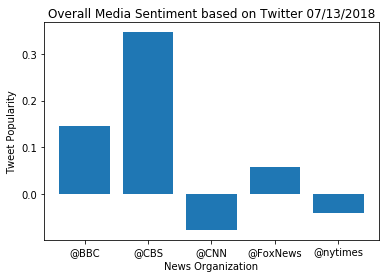

In [9]:
# Plot average sentiment compound of each source
# Reset index
updated_sentiments_df = avg_sentiments_df.reset_index()

plt.bar(updated_sentiments_df['News Organization'], updated_sentiments_df['Compound Score'])
plt.title(f'Overall Media Sentiment based on Twitter {present_date}')
plt.xlabel('News Organization')
plt.ylabel('Tweet Popularity')
plt.savefig('AvgCompoundNewsMedia.png')
plt.show()


In [ ]:
#Analysis
#1. Based on the scatter plot and bar graph CNN is the most negative news organization.
#2. Based on the scatter plot and bar graph CBS is the most positive news organization.
#3. Based on the scatter plot and bar graph Nytimes is the most neutral news organization.